In [1]:
import numpy as np
import pandas as pd
import pickle
#from build_database import flux_obj
from scipy import interpolate
import matplotlib.pyplot as plt
import os
import itertools
import random
import os
%matplotlib inline
# Autoload changes made in external editor:
%load_ext autoreload
%autoreload 2

# --------------- Latex Plot Beautification --------------------------
fig_width_pt = 650.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = 18 #fig_width_pt*inches_per_pt  # width in inches
fig_height = 9 # fig_width*golden_mean*2      # height in inches
fig_size =  [fig_width+1,fig_height+1]
params = {'backend': 'ps',
          'axes.labelsize': 20,
          'font.size': 16,
          'legend.fontsize': 14,
          'xtick.labelsize': 14,
          'ytick.labelsize': 14,
          'text.usetex': False,
          'figure.figsize': fig_size}
plt.rcParams.update(params)

# --------------- Latex Plot Beautification --------------------------

In [105]:
# Plot typical data from the precipitation model:
# time x out_lat,   1 plot per in_lat
# (For AGU 2016 poster)

from precip_model import precip_model

# p = precip_model(database="db_agu2016_kp0_full.pkl", cumsum=False)
# p = precip_model(database="banded_4_mode2_diff/db_band_3_10Mev_100Mev.pkl", cumsum=False)
p = precip_model(database='db_energy.pkl', cumsum=False)
in_lats = [50, 40, 30, 20]
out_lats = np.arange(30, 60, step=0.1)
out_lons = [0] #np.arange(-3,3, step=2)

lon_plotind = 0

num_inlats = len(in_lats)
t = p.t


interp_d = p.get_multiple_precip_at(in_lats, out_lats, out_lons, t)

(4, 300, 1, 2000)
0.509485517385
24.9969287755
61.3167535878
0.0899330447421


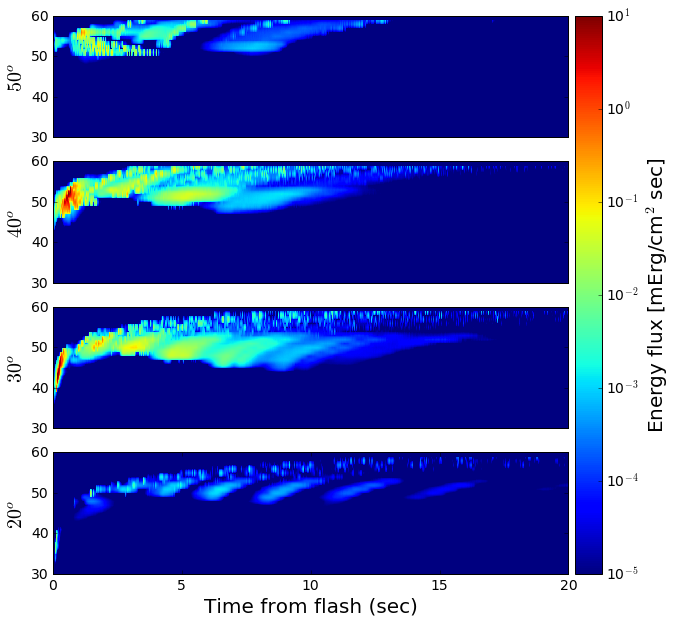

In [107]:
# --------------- Latex Plot Beautification --------------------------
fig_width_pt = 650.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = 10 #fig_width_pt*inches_per_pt  # width in inches
fig_height = 9 # fig_width*golden_mean*2      # height in inches
fig_size =  [fig_width+1,fig_height+1]
params = {'backend': 'ps',
          'axes.labelsize': 20,
          'font.size': 16,
          'legend.fontsize': 14,
          'xtick.labelsize': 14,
          'ytick.labelsize': 14,
          'text.usetex': False,
          'figure.figsize': fig_size}
plt.rcParams.update(params)

# clims = [-3,5]
clims = [-5, 1]
# clims = [-8, -4]
print np.shape(interp_d)

# fig, ax = plt.subplots(len(in_lats),1)

fig = plt.figure()

ax=[]
for i,lat in enumerate(in_lats):
    ax.append(fig.add_subplot(num_inlats,1,i+1))
    #Nv = np.log10(interp_d[i,:,2:] - interp_d[i,:,0:-2])
    Nv = np.log10(np.maximum(0,interp_d[i,:,lon_plotind,:]))
    Nv = np.clip(Nv,clims[0],clims[1])
    print np.max(interp_d[i,:,lon_plotind,:])
    p1 = plt.pcolormesh(t, out_lats, Nv)
    ax[i].set_xticks([])
    ax[i].set_yticks([30, 40, 50, 60])
    ax[i].set_ylabel('$%d^o$'%lat)
    plt.clim(clims)

ax[-1].set_xticks(np.arange(0, t[-1]+1,step=5))
ax[-1].set_xlabel('Time from flash (sec)')

cb = plt.colorbar(p1, ax=ax, pad=0.01)
ctix = np.arange(clims[0], clims[1] + 1, step=1)
cb.set_ticks(ctix)
cb.set_ticklabels(['10$^{%d}$'%k for k in ctix])
# cb.set_label('Particle flux [el/cm$^2$ sec]')
cb.set_label('Energy flux [mErg/cm$^2$ sec]')
# plt.suptitle('Relative particle flux (10 Mev to 100 Mev)')

# plt.savefig('banded_4_mode2_diff/db_band_3_10Mev_100Mev.png',bbox_inches='tight',ldpi=300)

plt.savefig('precip_timeseries_energy.png', bbox_inches='tight', ldpi=300)
    


In [34]:
dir(cb)

['_A',
 '__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_solids',
 '_boundaries',
 '_central_N',
 '_config_axes',
 '_edges',
 '_extend_lower',
 '_extend_upper',
 '_extended_N',
 '_find_range',
 '_get_extension_lengths',
 '_inside',
 '_label',
 '_labelkw',
 '_locate',
 '_mesh',
 '_outline',
 '_patch_ax',
 '_process_values',
 '_proportional_y',
 '_set_label',
 '_slice_dict',
 '_ticker',
 '_uniform_y',
 '_values',
 '_y',
 'add_checker',
 'add_lines',
 'alpha',
 'autoscale',
 'autoscale_None',
 'ax',
 'boundaries',
 'callbacksSM',
 'changed',
 'check_update',
 'cmap',
 'colorbar',
 'config_axis',
 'dividers',
 'draw_all',
 'drawedges',
 'extend',
 'extendfrac',
 'extendrect',
 'filled',
 'formatter',
 'get_array',
 'get_clim',
 'get_cmap',
 'lines',
 'locator',
 'map

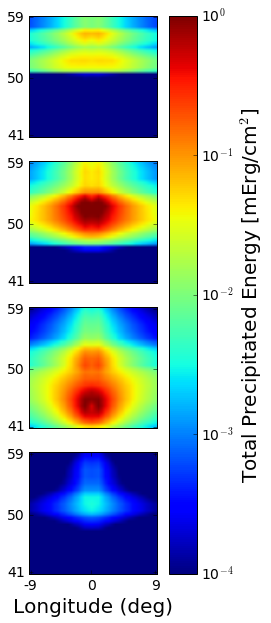

In [80]:
# hot-spot maps:
# p = precip_model(database="db_agu2016_kp0_full.pkl", cumsum=False)
p = precip_model(database="db_energy.pkl", cumsum=False)
in_lats = [50, 40, 30, 20]
dl = 9
lat0 = 50
# out_lats = np.arange(30,60,step=0.5)

# lat0 = out_lats[peak_inds[0][0]]
out_lats = np.arange(lat0 - dl, lat0 + dl, step=.5)
out_lons = np.arange(-dl, dl +1, step=.5)

# clims=[0,4]
clims = [-4,0]
num_inlats = len(in_lats)
t = p.t

interp_d = p.get_multiple_precip_at(in_lats, out_lats, out_lons, t)

totes = np.sum(np.maximum(0, interp_d), axis=3)*(p.sc.T_STEP)
# fig, ax = plt.subplots(1,1)

Tv = np.log10(np.maximum(0,totes))
Tv = np.clip(Tv, clims[0],clims[1])
Tv[np.isnan(Tv)] = clims[0]
fig = plt.figure()
ax=[]
for i,ilat in enumerate(in_lats):
    ax.append(fig.add_subplot(num_inlats,1,i+1))
    
    
#    ax[i].pcolormesh(out_lons, out_lats, Tv[0,:,:])
    p1 = ax[i].imshow(Tv[i,:,:], origin='lower',aspect='auto')
    ax[i].set_aspect('equal')

    p1.set_clim(clims)
#     find center coords:
#     peak_inds = np.where(totes[i,:,:]==np.max(totes[i,:,:]))
    

    ax[i].set_yticks([0, (len(out_lats)/2.) - 1, len(out_lats) -1 ])
    ax[i].set_yticklabels([lat0 - dl, lat0, lat0 + dl])
    ax[i].set_xticks([])
#     ax[i].set_ylabel('$%d^o$'%ilat)


ax[-1].set_xticks([0, (len(out_lons)/2.) - 1, len(out_lons) -1 ])
ax[-1].set_xticklabels([-dl, 0, dl])
ax[-1].set_xlabel('Longitude (deg)')
cb = plt.colorbar(p1, ax=ax, pad=0.02)
ctix = np.arange(clims[0], clims[1] + 1, step=1)
cb.set_ticks(ctix)
cb.set_ticklabels(['10$^{%d}$'%k for k in ctix])
# cb.set_label('Total Precipitation [el/cm$^2$]')
cb.set_label('Total Precipitated Energy [mErg/cm$^2$]')

# plt.savefig('hotspots.png', bbox_inches='tight')
plt.savefig('hotspots_energy.png', bbox_inches='tight')

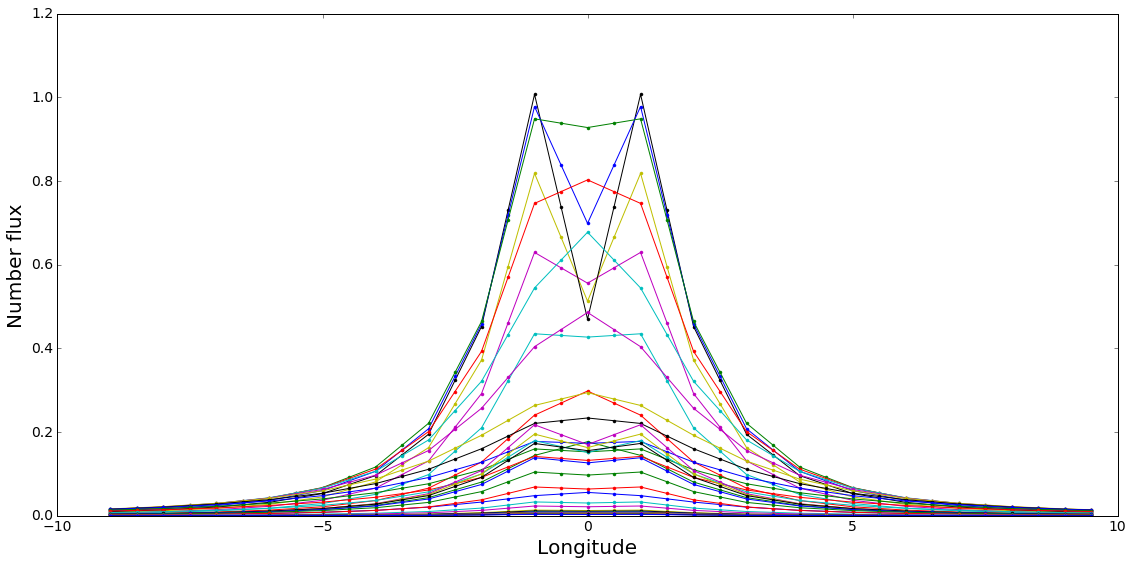

In [6]:
# p = precip_model(database="db_agu2016_kp0_full.pkl", cumsum=False)
plt.figure()
plt.plot(out_lons, totes[2,:,:].T,'.-');
plt.xlabel('Longitude')
plt.ylabel('Number flux')

[array([  5.37399321e-04,   4.29949079e+00,   5.72739987e-02]), array([ 0.00309437,  2.15757782, -0.06626712]), array([ 0.0057228 ,  1.98154004, -0.07233137]), array([ 0.03575873,  1.98014039,  0.13466512]), array([ 0.06579653,  1.97972893,  0.1401115 ]), array([ 0.2058475 ,  1.97286725,  0.12265321]), array([ 0.34590378,  1.97146994,  0.11934147]), array([ 0.76221519,  2.07149334, -0.10764978]), array([ 1.17858179,  2.10171665, -0.10423477]), array([ 2.19906512,  2.21355823, -0.10057008]), array([ 3.22015301,  2.25525786, -0.09929703]), array([ 4.78947609,  2.42695093, -0.08470107]), array([ 6.36170209,  2.51691831, -0.07748649]), array([ 9.96215768,  2.98588761, -0.06612542]), array([ 13.6212176 ,   3.20780441,  -0.06271135]), array([ 22.68701313,   3.31858671,  -0.05745393]), array([ 31.7594758 ,   3.36594523,  -0.05529505]), array([ 51.44826593,   3.0438287 ,  -0.05218267]), array([  7.12702199e+01,   2.90024048e+00,  -5.16696685e-02]), array([  9.39502549e+01,   2.58603020e+00,  -

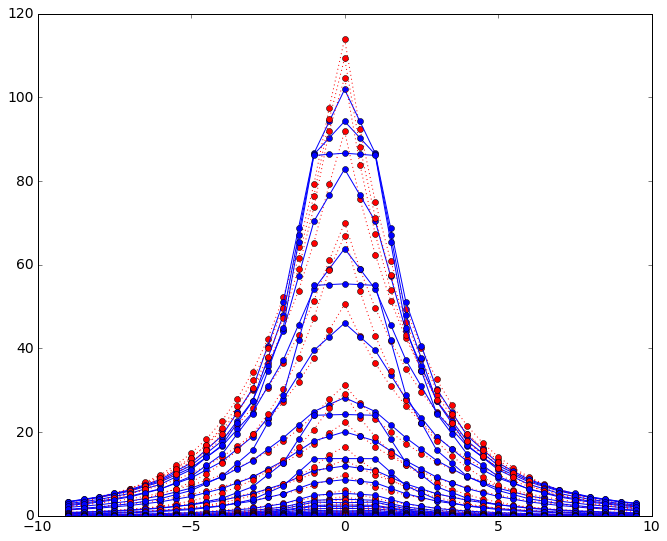

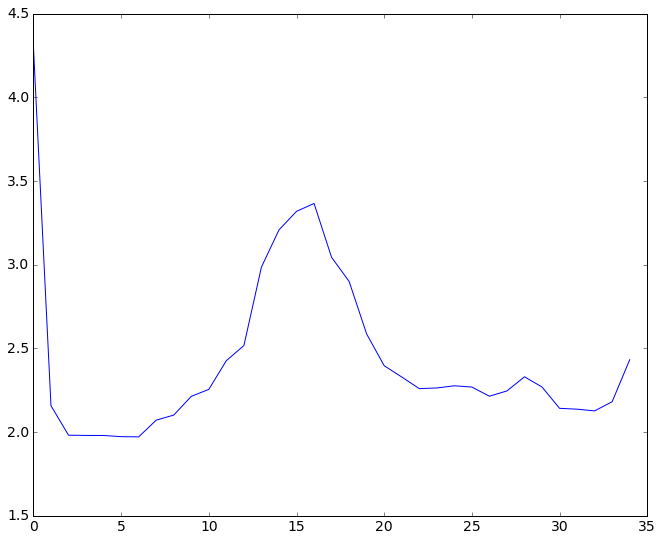

In [71]:
from scipy.optimize import curve_fit
from __future__ import division

# Gaussian curve model
def Gauss(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

def Laplace(x, a, b, x0):
    return a*np.exp(-np.abs(x - x0)/b)

def abslinear(x, m, b):
    return m*np.abs(x) + b

# from scipy import asarray as ar,exp
fitvals = []
plt.figure()
for zz in np.arange(0,35):
    x = out_lons
#     y = np.log10(np.maximum(0.0001,(totes[2,zz,:])))
    y = (totes[3,zz,:])

#     n = len(x)
#     mean = sum(x * y) / sum(y)
#     sigma = np.sqrt(sum(y * (x - mean)**2) / sum(y))



    # popt,pcov = curve_fit(gaus,x,y,p0=[0.1,mean,sigma])
    popt,pcov = curve_fit(Laplace,x,y,p0=[np.max(y), 1,0])
#     popt,pcov = curve_fit(abslinear, x, y, p0=[1,0])
    fitvals.append(popt)
#     print popt
#     plt.figure()
#     plt.plot(x,y,'b+:',label='data')
    plt.plot(x,Laplace(x,*popt),'ro:',label='fit')
#     plt.plot(x, abslinear(x, *popt),'rx-')
    plt.plot(x,y, 'bo-')
print fitvals
fitvals = np.asarray(fitvals)
plt.figure(2)
plt.plot(fitvals[:,1])

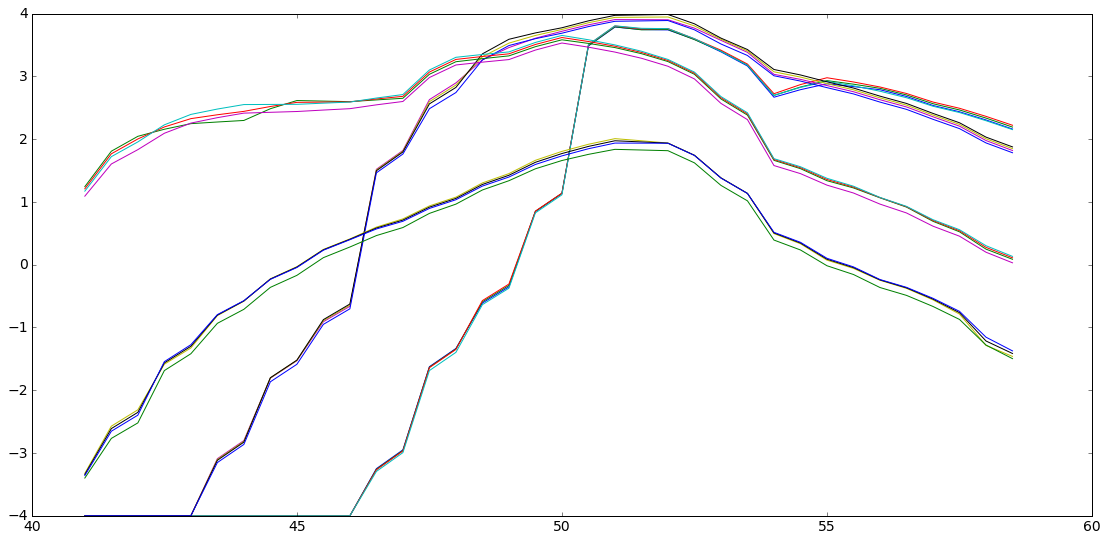

In [382]:
from scipy.optimize import curve_fit
from __future__ import division

# Gaussian curve model
def Gauss(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

def Laplace(x, a, b, x0):
    return a*np.exp(-np.abs(x - x0)/b)

def abslinear(x, m, b):
    return m*np.abs(x) + b

# from scipy import asarray as ar,exp
fitvals = []
plt.figure()
for i, iLat in enumerate(in_lats):
    for zz in np.arange(18,22):
        x = out_lats
        y = np.log10(np.maximum(0.0001,(totes[i,:,zz])))


        popt,pcov = curve_fit(abslinear, x, y, p0=[1,0])
        fitvals.append(popt)
    #     print popt
    #     plt.figure()
    #     plt.plot(x,y,'b+:',label='data')

    #     plt.plot(x, abslinear(x, *popt),'rx-')
        plt.plot(x,y)
    # fitvals = np.asarray(fitvals)
    # plt.figure(2)
    # plt.plot(fitvals[:,0])

(36, 38) (36, 38) (36, 38)


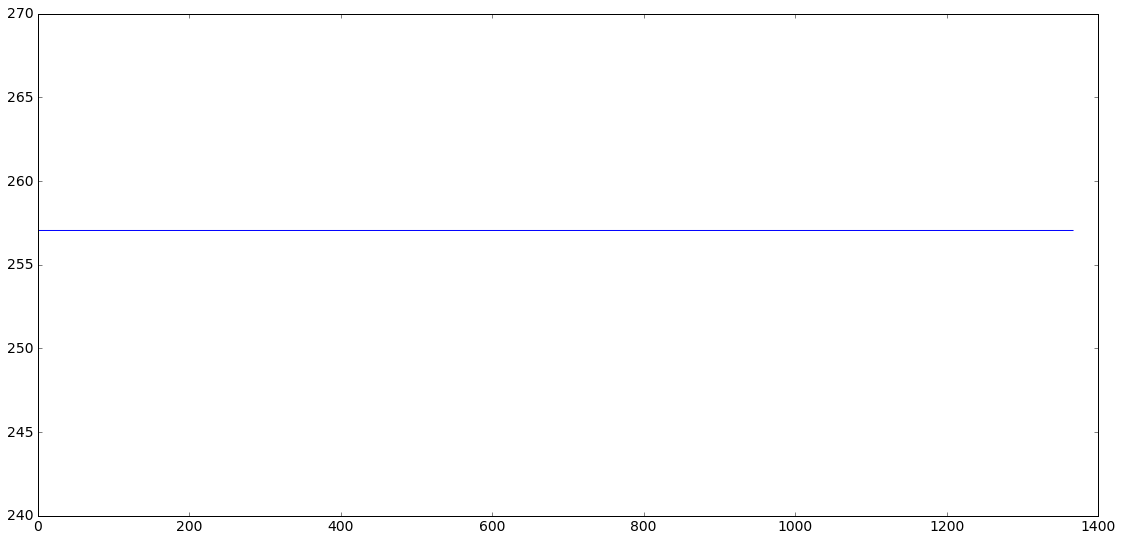

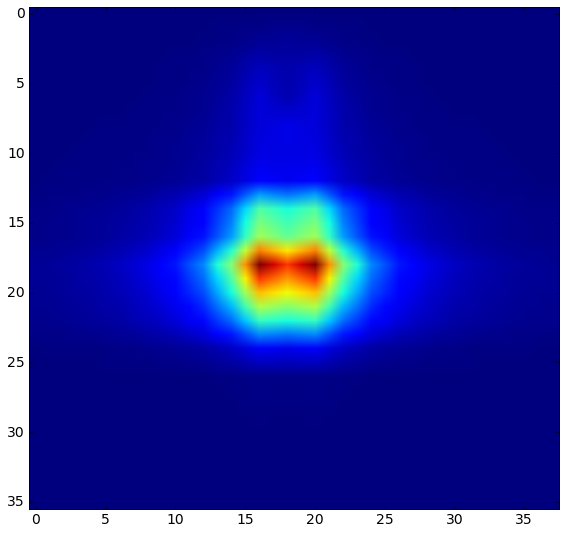

In [349]:

def twoD_Gaussian((x, y), amplitude, xo, yo, sigma_x, sigma_y, theta, offset):
    xo = float(xo)
    yo = float(yo)    
    a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
    b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)
    c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)
    g = offset + amplitude*np.exp( - (a*((x-xo)**2) + 2*b*(x-xo)*(y-yo) 
                            + c*((y-yo)**2)))
    return g.ravel()



x, y = np.meshgrid(out_lons, out_lats)
data = totes[2,:,:]

print np.shape(x), np.shape(y), np.shape(data)


# add some noise to the data and try to fit the data generated beforehand
initial_guess = (3,100,100,20,40,0,10)

# data_noisy = data + 0.2*np.random.normal(size=data.shape)

popt, pcov = curve_fit(twoD_Gaussian, (x, y), data.ravel(), p0=initial_guess)

data_fitted = twoD_Gaussian((x, y), *popt)

plt.plot(data_fitted)
fig, ax = plt.subplots(1, 1)
ax.hold(True)
ax.imshow(data)
# ax.contour(x, y, data_fitted.reshape(np.shape(x)), 8, colors='w')
# plt.show()








In [29]:
plt.colorbar?